Firstly, we import the necessary libraries

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

The next step is importing the CSV file:

In [2]:
df = pd.read_csv('/content/ProyectoMineria-Banco (1).csv')

#Display the first rows of the data:
df.head()

,NUM_SOLICITUD,SUCURSAL,STATUS_SOLICITUD,PRODUCTO,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,CUENTA_ASIGNADA,MESES_VENCIDOS,SALDO_CUENTA,...,CAPACIDAD_PAGO_TOTAL,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,2.010000e+16,113,APROBADA,CREDITO_AUTO,APROBADO,REGULAR,687000,9.980000e+14,1.0,"274,800",...,40%,0,242,780,0,0,0,30,FAMILIARES,PREPARATORIA
1,2.010000e+16,185,APROBADA,CREDITO_AUTO,APROBADO,BUENO,318000,9.980000e+14,1.0,"365,700",...,115%,0,251,740,31269,790,0,27,FAMILIARES,LICENCIATURA
2,2.010000e+16,143,APROBADA,CREDITO_AUTO,APROBADO,BUENO,317001,9.980000e+14,0.0,"288,471",...,91%,0,215,704,101992,0,0,28,PROPIA,LICENCIATURA
3,2.010000e+16,173,APROBADA,CREDITO_AUTO,APROBADO,BUENO,315501,9.980000e+14,1.0,63100,...,0.91,0,215,704,101992,0,0,28,PROPIA,LICENCIATURA
4,2.010000e+16,180,APROBADA,CREDITO_AUTO,APROBADO,BUENO,311101,9.980000e+14,1.0,62220,...,91%,0,215,704,101992,0,0,28,PROPIA,LICENCIATURA


Now, we perform an inspection of the dataset structure and generate descriptive statistics to understand its composition, data types, and overall distribution.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NUM_SOLICITUD            4352 non-null   float64
 1   SUCURSAL                 4352 non-null   int64  
 2   STATUS_SOLICITUD         4352 non-null   object 
 3   PRODUCTO                 4352 non-null   object 
 4   APROBACION_TC            4352 non-null   object 
 5   TIPO_CTE                 4352 non-null   object 
 6   LINEA_CREDITO_FINAL      4352 non-null   int64  
 7   CUENTA_ASIGNADA          1433 non-null   float64
 8   MESES_VENCIDOS           1984 non-null   float64
 9   SALDO_CUENTA             1433 non-null   object 
 10  CAPACIDAD_TC             1654 non-null   object 
 11  INGRESO_INFERIDO         4352 non-null   int64  
 12  COMPROBANTE_INGRESOS     4352 non-null   object 
 13  SEGMENTO_CLIENTE         4352 non-null   object 
 14  CLIENTE_CDE             

The dataset consists of 4,352 records and 27 columns, which include both numerical and categorical variables related to credit applications, customer characteristics, and financial metrics.

It contains:

11 integer numerical columns, mainly related to amounts, scores, and counts, such as SCORE_CLIENTE, NUM_CREDITOS, EDAD.

3 decimal numerical columns, used for missing-value placeholders or more detailed financial metrics.

13 categorical columns, representing statuses, segments, customer types, risk levels, and other qualitative attributes.

There is also a noticeable presence of missing values in several key variables:

CUENTA_ASIGNADA has only 1,433 non-null values.

MESES_VENCIDOS has 1,984 non-null values.

CAPACIDAD_TC has 1,654 non-null values.

In [5]:
df.describe(include='all')

,NUM_SOLICITUD,SUCURSAL,STATUS_SOLICITUD,PRODUCTO,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,CUENTA_ASIGNADA,MESES_VENCIDOS,SALDO_CUENTA,...,CAPACIDAD_PAGO_TOTAL,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
count,4.352000e+03,4352.000000,4352,4352,4352,4352,4352.000000,1.433000e+03,1984.000000,1433,...,4352,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352.000000,4352,4352
unique,NaN,NaN,5,4,3,3,NaN,NaN,NaN,1049,...,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
top,NaN,NaN,RECHAZADA,PENDIENTE,RECHAZADO,MALO,NaN,NaN,NaN,"1,980",...,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIPOTECA,LICENCIATURA
freq,NaN,NaN,2614,2712,2712,2919,NaN,NaN,NaN,7,...,2919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1272,1528
mean,2.010000e+16,184.020221,NaN,NaN,NaN,NaN,11049.721048,9.980000e+14,0.769153,NaN,...,NaN,1.958410,139.227022,241.857996,3788.290671,351.980009,0.002068,42.654412,NaN,NaN
std,0.000000e+00,49.330475,NaN,NaN,NaN,NaN,31738.818105,0.000000e+00,0.804135,NaN,...,NaN,1.804351,61.451166,345.908502,13433.619574,2912.509016,0.050238,10.323277,NaN,NaN
min,2.010000e+16,100.000000,NaN,NaN,NaN,NaN,0.000000,9.980000e+14,0.000000,NaN,...,NaN,0.000000,89.000000,0.000000,0.000000,0.000000,0.000000,25.000000,NaN,NaN
25%,2.010000e+16,146.000000,NaN,NaN,NaN,NaN,0.000000,9.980000e+14,0.000000,NaN,...,NaN,0.000000,94.000000,0.000000,0.000000,0.000000,0.000000,34.000000,NaN,NaN
50%,2.010000e+16,180.000000,NaN,NaN,NaN,NaN,0.000000,9.980000e+14,1.000000,NaN,...,NaN,2.000000,99.000000,0.000000,0.000000,0.000000,0.000000,43.000000,NaN,NaN
75%,2.010000e+16,218.000000,NaN,NaN,NaN,NaN,7425.000000,9.980000e+14,1.000000,NaN,...,NaN,3.000000,210.000000,714.000000,404.500000,0.000000,0.000000,52.000000,NaN,NaN


Based on this initial exploration, it was identified that the most complete and consistent variables are those related to the applicant’s profile: edad, escolaridad, tipo_vivienda, segmento_cliente, ingreso_inferido, and the various puntajes. These were the same variables that proved to be the most useful during the previously conducted marketing analysis.

On the other hand, it was confirmed that columns such as CUENTA_ASIGNADA, MESES_VENCIDOS, and CAPACIDAD_TC contain a large number of missing values. This aligns with the fact that these variables describe behaviors that occur after the credit is granted, making them less relevant for a marketing perspective focused on customer profiling.

Additionally, the descriptive summary revealed trends that match the findings from the earlier analysis: a strong concentration in Tarjeta Clásica, predominance of the Medio A customer segment, higher levels of escolaridad, and an age range mainly centered between 30 and 50 years old. These patterns had already appeared in the Power BI dashboard visualizations and in the segmentations performed in Excel.

Subsequently, we improve the column names by removing accents and spaces, and converting all of them to lowercase:

In [7]:
df.columns = (
    df.columns
    .str.strip()         # elimina espacios al inicio y final
    .str.lower()         # convierte todo a minúsculas
    .str.replace(' ', '_') # cambia espacios por guiones bajos
    .str.replace('á', 'a') # elimina acentos
    .str.replace('é', 'e')
    .str.replace('í', 'i')
    .str.replace('ó', 'o')
    .str.replace('ú', 'u')
)
df.columns

Index(['num_solicitud', 'sucursal', 'status_solicitud', 'producto',
       'aprobacion_tc', 'tipo_cte', 'linea_credito_final', 'cuenta_asignada',
       'meses_vencidos', 'saldo_cuenta', 'capacidad_tc', 'ingreso_inferido',
       'comprobante_ingresos', 'segmento_cliente', 'cliente_cde',
       'suma_lineas_revolventes', 'nivel_riesgo', 'capacidad_pago_total',
       'solicitudes_rechazadas', 'score_cliente', 'score_comportamiento',
       'suma_saldos_tarjetas', 'suma_pago_min_tarjetas', 'num_creditos',
       'edad', 'tipo_vivienda', 'escolaridad'],
      dtype='object')

From this point onward, the same procedure used to create the Data Marketing Minería file will be replicated. The purpose is to practice and learn the workflow behind a marketing-focused analysis that I had already completed previously and therefore understand well.

The first step is to filter the columns that we already know are useful for describing the customer, and remove those that are not relevant or whose purpose is not fully clear.

In [8]:
columnas_mkt = [
    'producto',
    'segmento_cliente',
    'cliente_cde',
    'escolaridad',
    'tipo_vivienda',
    'edad',
    'aprobacion_tc',
    'status_solicitud'
]

df_mkt = df[columnas_mkt].copy()
df_mkt.head()

,producto,segmento_cliente,cliente_cde,escolaridad,tipo_vivienda,edad,aprobacion_tc,status_solicitud
0,CREDITO_AUTO,ALTO_A,NO_CLIENTE,PREPARATORIA,FAMILIARES,30,APROBADO,APROBADA
1,CREDITO_AUTO,MEDIO_A,CLIENTE_BANCO,LICENCIATURA,FAMILIARES,27,APROBADO,APROBADA
2,CREDITO_AUTO,ALTO_A,CLIENTE_BANCO,LICENCIATURA,PROPIA,28,APROBADO,APROBADA
3,CREDITO_AUTO,MEDIO_A,CLIENTE_BANCO,LICENCIATURA,PROPIA,28,APROBADO,APROBADA
4,CREDITO_AUTO,MEDIO_A,CLIENTE_BANCO,LICENCIATURA,PROPIA,28,APROBADO,APROBADA


Now that the columns have been filtered, we proceed to filter the rows. Remember that our target variable is aprobacion_tc, and the value pre-aprobado does not provide useful information for our analysis.

In [14]:
df_mkt = df_mkt[df_mkt['aprobacion_tc'].str.lower() != 'pre-aprobado']
df_mkt['aprobacion_tc'].str.lower().value_counts() #comprobamos que no queden pendientes



,count
aprobacion_tc,
rechazado,2712
aprobado,1433


With this cleaned section, we can now create the RangoEdad variable, just like we did in Excel:

In [16]:
def rango_edad(edad):
    if edad <= 25:
        return "joven"
    elif edad <= 35:
        return "adulto joven"
    elif edad <= 50:
        return "adulto maduro"
    else:
        return "adulto mayor"

df_mkt['rango_edad'] = df_mkt['edad'].apply(rango_edad)
df_mkt.head()

,producto,segmento_cliente,cliente_cde,escolaridad,tipo_vivienda,edad,aprobacion_tc,status_solicitud,rango_edad
0,CREDITO_AUTO,ALTO_A,NO_CLIENTE,PREPARATORIA,FAMILIARES,30,APROBADO,APROBADA,adulto joven
1,CREDITO_AUTO,MEDIO_A,CLIENTE_BANCO,LICENCIATURA,FAMILIARES,27,APROBADO,APROBADA,adulto joven
2,CREDITO_AUTO,ALTO_A,CLIENTE_BANCO,LICENCIATURA,PROPIA,28,APROBADO,APROBADA,adulto joven
3,CREDITO_AUTO,MEDIO_A,CLIENTE_BANCO,LICENCIATURA,PROPIA,28,APROBADO,APROBADA,adulto joven
4,CREDITO_AUTO,MEDIO_A,CLIENTE_BANCO,LICENCIATURA,PROPIA,28,APROBADO,APROBADA,adulto joven


To end with this part, let´s export the file:

In [17]:
df_mkt.to_csv('/content/data_marketing_limpio_python.csv', index=False)


Finally, we will create visualizations related to the data cleaning process we just performed. In the first chart, we will analyze the distribution of the rangoedad variable, just considering the approved people.

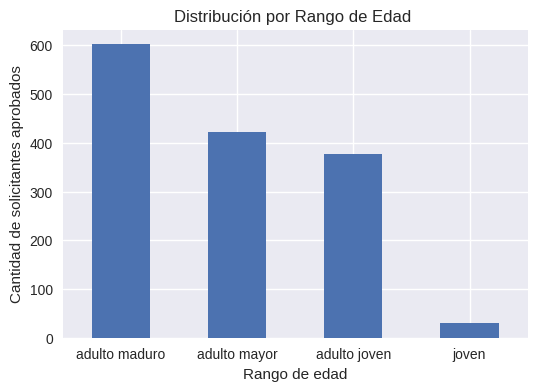

In [24]:
df_aprobados = df_mkt[df_mkt['aprobacion_tc'].str.lower() == 'aprobado']

df_aprobados['rango_edad'].value_counts().plot(
    kind='bar',
    figsize=(6,4)
)

plt.title('Distribución por Rango de Edad ')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de solicitantes aprobados')
plt.xticks(rotation=0)
plt.show()


The second chart will help us visualize the educational level of the rejected applicants.

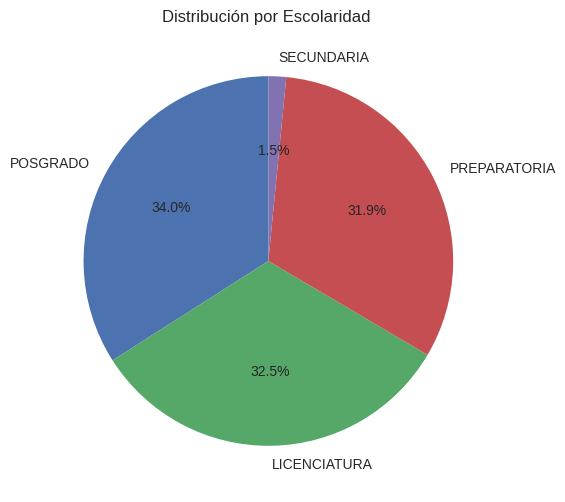

In [22]:
df_rechazados = df_mkt[df_mkt['aprobacion_tc'].str.lower() == 'rechazado']
df_rechazados['escolaridad'].value_counts().plot(
    kind='pie',
    figsize=(6,6),
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribución por Escolaridad ')
plt.ylabel('')
plt.show()


For the third visualization, we will use a horizontal bar chart to display the 'vivienda' variable statistics.

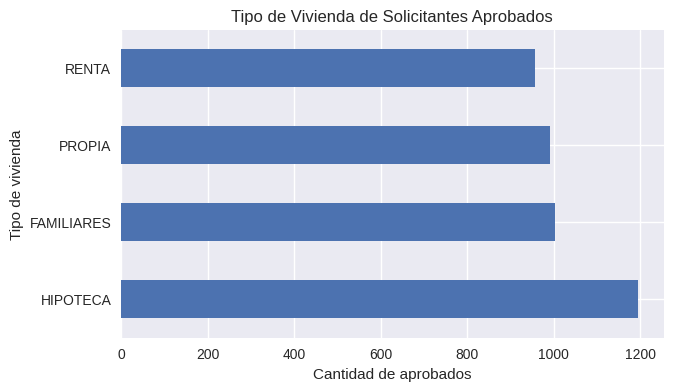

In [23]:
df_mkt['tipo_vivienda'].value_counts().plot(
    kind='barh',
    figsize=(7,4)
)

plt.title('Tipo de Vivienda de Solicitantes Aprobados')
plt.xlabel('Cantidad de aprobados')
plt.ylabel('Tipo de vivienda')
plt.show()

This Python exercise made it possible to replicate and automate part of the marketing analysis conducted in the original project. Through the selection of relevant variables, record filtering, the creation of derived attributes, and the generation of exploratory visualizations, the patterns previously identified in Excel and Power BI were reinforced.

Personally, at least for this exercise, I found data cleaning and preparation to be much faster and easier in Python compared to what I did in Excel, since transformations can be applied automatically and are fully reproducible. However, I still prefer Power BI for visualizations, especially when it comes to presentations and more visually oriented analysis.